## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [1]:
import os
import json

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [2]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_target.npy

--2023-11-29 18:10:07--  https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44928 (44K) [application/octet-stream]
Saving to: ‘hw_final_open_data.npy’

hw_final_open_data. 100%[===================>]  43.88K  --.-KB/s    in 0.01s   

2023-11-29 18:10:08 (3.17 MB/s) - ‘hw_final_open_data.npy’ saved [44928/44928]

--2023-11-29 18:10:08--  https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [3]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

In [4]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,-0.565814,-0.430544,-0.56863,-0.379486,-0.527420,-0.160691,-0.575438
1,-0.562880,-0.051177,-0.56863,-0.134094,-0.506339,0.795601,-0.575438
2,-0.560292,0.987380,-0.56863,0.344372,-0.481199,3.249530,-0.575438
3,-0.561336,0.434373,-0.56863,0.107739,-0.492241,1.960089,-0.575438
4,-0.563982,-0.249578,-0.56863,-0.251161,-0.515020,0.304072,-0.575438
...,...,...,...,...,...,...,...
795,-0.562995,-0.076328,-0.56863,-0.148095,-0.507292,0.733981,-0.575438
796,-0.566049,-0.445115,-0.56863,-0.391541,-0.528851,-0.199316,-0.575438
797,-0.560825,0.675599,-0.56863,0.214591,-0.487007,2.526183,-0.575438
798,-0.561542,0.350201,-0.56863,0.068784,-0.494273,1.760945,-0.575438


In [5]:
pd.DataFrame(target)

,0
0,0.382870
1,2.742402
2,7.239643
3,4.731191
4,1.317211
...,...
795,2.403090
796,0.116159
797,5.261471
798,4.034624


Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [24]:
rf = RandomForestRegressor(max_depth=6)
rf.fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.13894
validation mse = 0.23750


In [27]:
mse_train = mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y))
mse_val = mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y))
print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.13894
validation mse = 0.23750


In [28]:
max([np.round((1 - mse_val) * 1.5, 2), 0])

1.14

##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [29]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

--2023-11-29 18:13:19--  https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [application/octet-stream]
Saving to: ‘hw_final_closed_data.npy’

hw_final_closed_dat 100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-11-29 18:13:19 (22.8 MB/s) - ‘hw_final_closed_data.npy’ saved [11328/11328]



In [30]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [ ]:
# optional transformations

In [31]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [32]:
predicted_values = np.round(get_predictions(model=rf, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [33]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)

print('File saved to `submission_dict_final_p01.npy`')
# __________end of block__________

File saved to `submission_dict_final_p01.npy`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

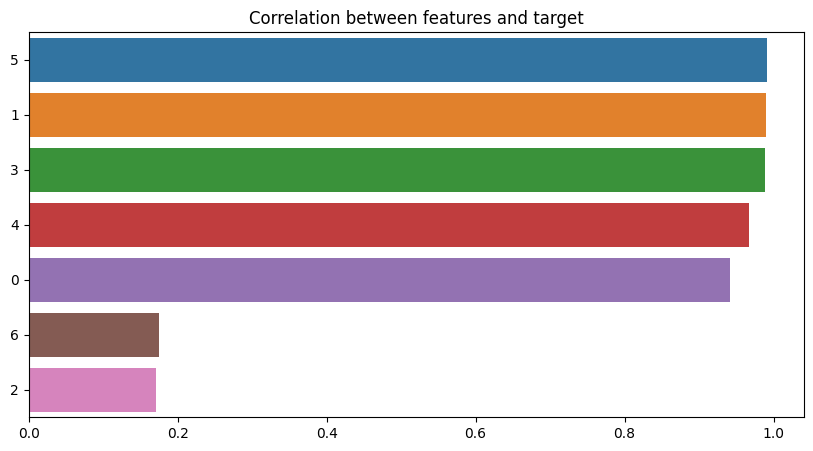

In [34]:
fig, ax = plt.subplots(1, figsize=(10, 5))
df = pd.DataFrame(pd.DataFrame(train_x).corrwith(pd.Series(train_y)).sort_values(ascending=False)).transpose()
sns.barplot(data=df, orient='h')
ax.set(title='Correlation between features and target');

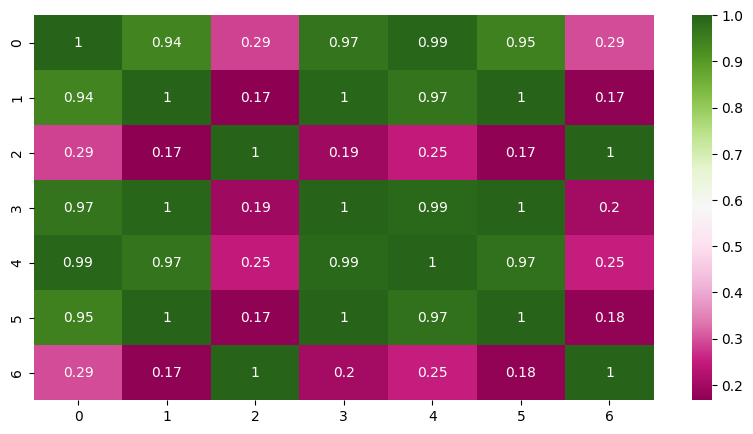

In [35]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(train_x).corr(), annot=True, cmap="PiYG");

In [74]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+3))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, 1] = feature_matrix[:, 0] * np.sin(abs(feature_matrix[:, 1]))
    new_feature_matrix[:, 7] = feature_matrix[:, 0] * np.log(abs(feature_matrix[:, 1]))
    new_feature_matrix[:, 8] = np.cos(abs(feature_matrix[:, 0])) * np.sin(abs(feature_matrix[:, 1]))
    #new_feature_matrix[:, 9] = np.cosh(feature_matrix[:, 0]) * np.sinh(abs(feature_matrix[:, 1]))
    return new_feature_matrix

In [87]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+7))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    #new_feature_matrix[:, 2] = np.exp(feature_matrix[:, 2] * np.random.normal(0, 1, feature_matrix[:, 0].shape[0]) * (-1))
    #new_feature_matrix[:, 6] = np.exp(feature_matrix[:, 6] * np.random.noncentral_chisquare(5, 5, feature_matrix[:, 0].shape[0]))
    new_feature_matrix[:, 7] = feature_matrix[:, 0] * np.random.normal(0, 1, feature_matrix[:, 0].shape[0])
    new_feature_matrix[:, 8] = feature_matrix[:, 2] + np.power(abs(feature_matrix[:, 2]), abs(feature_matrix[:, 0]))
    new_feature_matrix[:, 9] = feature_matrix[:, 2] + np.random.noncentral_chisquare(5, 1, feature_matrix[:, 0].shape[0])
    new_feature_matrix[:, 10] = np.cosh(feature_matrix[:, 0]) * np.sinh(abs(feature_matrix[:, 1]))
    new_feature_matrix[:, 11] = feature_matrix[:, 0] * np.cbrt(feature_matrix[:, 3]) * np.random.noncentral_chisquare(1, 1, feature_matrix[:, 0].shape[0])
    new_feature_matrix[:, 12] = np.cos(abs(feature_matrix[:, 3])) * np.sin(abs(feature_matrix[:, 5]))
    new_feature_matrix[:, 13] = np.random.vonmises(4, 3, feature_matrix[:, 0].shape[0]) * np.sinh(abs(feature_matrix[:, 1]))
    #new_feature_matrix[:, 0] = np.exp(feature_matrix[:, 0] * np.random.normal(100, 0.5, feature_matrix[:, 0].shape[0]))
    #new_feature_matrix[:, 1] = np.exp(feature_matrix[:, 1] * np.random.power(0.1, feature_matrix[:, 0].shape[0]))
    #new_feature_matrix[:, 3] = np.exp(feature_matrix[:, 3] * np.random.power(0.1, feature_matrix[:, 0].shape[0]))
    #new_feature_matrix[:, 4] = np.exp(feature_matrix[:, 4] * np.random.laplace(0, 5, feature_matrix[:, 0].shape[0]))
    #new_feature_matrix[:, 5] = np.exp(feature_matrix[:, 5] * np.random.power(0.1, feature_matrix[:, 0].shape[0]))
    return new_feature_matrix

In [ ]:
train_x.shape[1]

7

In [88]:
transformed_train_x = my_transformation(train_x)

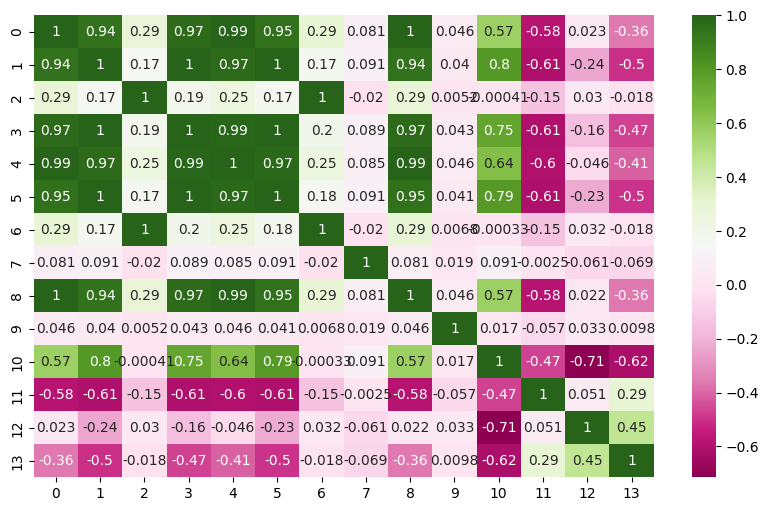

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(transformed_train_x).corr(), annot=True, cmap="PiYG");

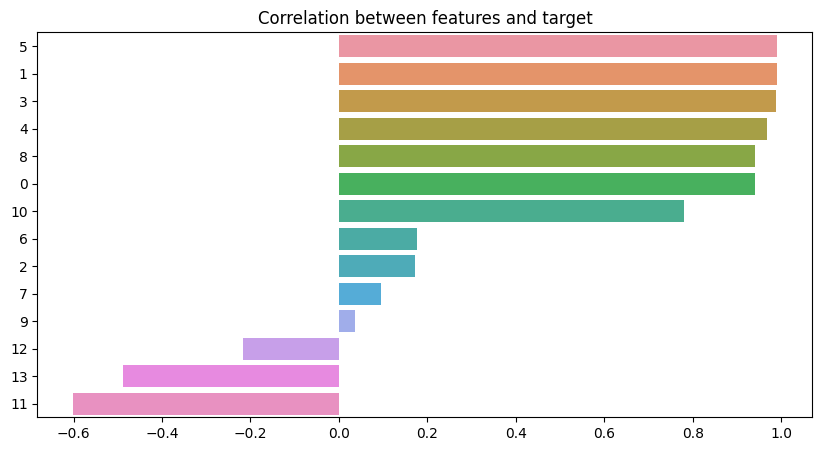

In [90]:
fig, ax = plt.subplots(1, figsize=(10, 5))
df = pd.DataFrame(pd.DataFrame(transformed_train_x).corrwith(pd.Series(train_y)).sort_values(ascending=False)).transpose()
sns.barplot(data=df, orient='h')
ax.set(title='Correlation between features and target');

In [133]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
lr = LinearRegression()
#lr = Lasso()

lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.08691
validation mse = 0.08966


In [ ]:
train mse =	 0.08992
validation mse = 0.09192

In [194]:
mse_train = mean_squared_error(lr.predict(transformed_train_x), train_y)
mse_val = mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y)
print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.08691
validation mse = 0.08964


In [195]:
max([0, np.round((0.5 - mse_val) * 3 , 2)])

1.23

Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [196]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [197]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [443994135.7978, -136139.9969, 1650489823174.4717, -165631.3551, 1769052.4168, 80400.0228, -132051498676.6781, 0.0128, -1099743740.878, -0.0027, 1.3864, 0.0247, -0.3022, 0.0039]
b = 862957167681.6727


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [198]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже

In [199]:
# __________example_submission_start__________

def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0
    ] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [-0.0027, -0.2637, 0.0, -0.1134, -0.0165, -0.9329, 0.0, 0.1293]
b_submission = 1.1312
# __________example_submission_end__________

На этом задание завершено. Поздравляем!